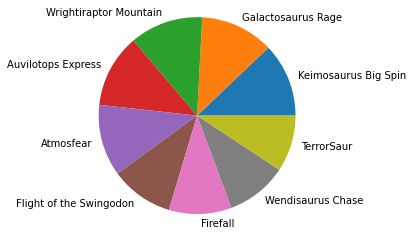

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_filename = 'dinofunworld-1.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute(" select name,count(VisitorID) as count from checkin as ch, attraction as att where ch.type='actual' and attraction=AttractionID and category like '%Thrill Rides%' group by name order by count desc;")
counts = c.fetchall()

visitStats = pd.DataFrame.from_records(counts, columns=['name', 'count'])
plt.pie(visitStats['count'],labels=visitStats['name'],shadow=False)
plt.axis('equal')
plt.show()

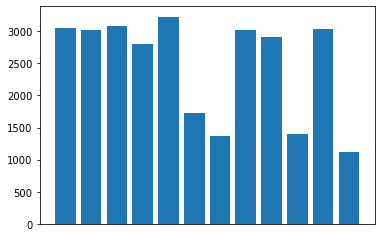

In [5]:
c.execute(" select name,count(VisitorID) as count from checkin as ch, attraction as att where attraction=AttractionID and category like '%food%' group by name;")
eatingData = c.fetchall()

eatFrame = pd.DataFrame.from_records(eatingData,columns=['name','count'])
plt.bar(range(len(eatFrame['name'])),eatFrame['count'])
plt.xticks([])
plt.show()

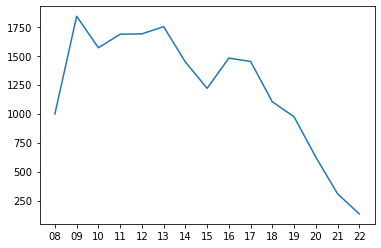

In [12]:
import matplotlib.pyplot as plt
import numpy as np

c.execute("select strftime('%H',timestamp) as ckhour,count(strftime('%H',timestamp)) as count from checkin as ch,attraction where ch.type='actual' and attraction=AttractionID and name='Atmosfear' group by ckhour order by ckhour;")
visitData=c.fetchall()

fig, ax = plt.subplots()  # Create a figure containing a single axes.
visitFrame = pd.DataFrame.from_records(visitData,columns=['ckhour','count'])
ax.plot(visitFrame['ckhour'], visitFrame['count'])  # Plot some data on the axes.
plt.show()

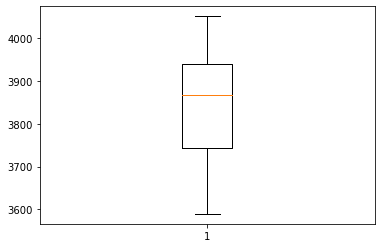

In [13]:
c.execute("select name,count(visitorid) as count from checkin as ch,attraction where ch.type='actual'and attraction=AttractionID and category like '%Kiddie Rides%' group by name order by count;")
visitByMan = c.fetchall() 

visitBoxFrame =pd.DataFrame.from_records(visitByMan,columns=['name', 'count'])
plt.boxplot(visitBoxFrame['count'])
plt.show()